# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [2]:
import numpy as np
import pandas as pd

In [17]:
df=pd.read_csv('petrol.csv')
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [18]:
import matplotlib.pyplot as plt
 
%matplotlib inline
import seaborn as sns

In [13]:
df.isnull().values.any()

False

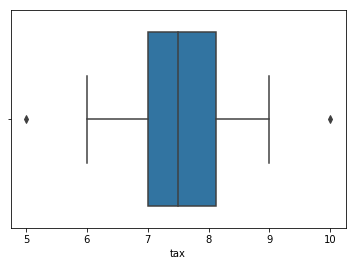

In [14]:
sns.boxplot(df['tax'])
# 2 data points needs to be removed based on below box plot


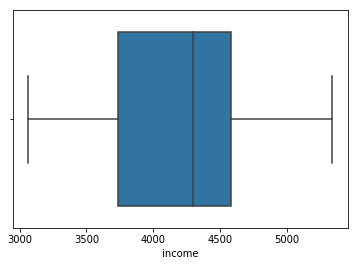

In [19]:
sns.boxplot(df['income'])
# 0 data points needs to be removed based on below box plot

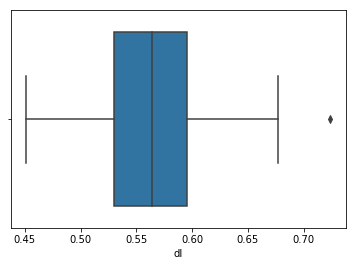

In [20]:
sns.boxplot(df['dl'])
# 1 data point needs to be removed based on below box plot

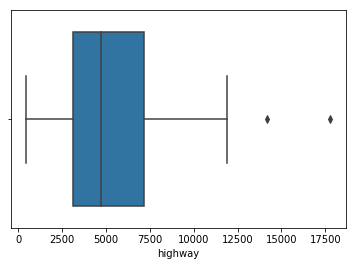

In [185]:
sns.boxplot(df['highway'])
# 2 data points needs to be removed based on below box plot

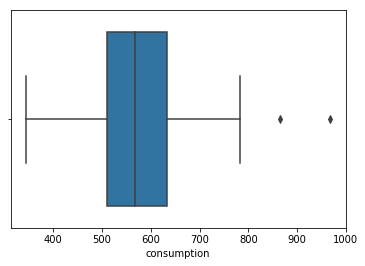

In [186]:
sns.boxplot(df['consumption'])
# 2 data points needs to be removed based on below box plot

In [22]:
q75, q25 = np.percentile(df['tax'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min,max)
df['Outlier'] = 0
df.loc[df['tax'] < min, 'Outlier'] = 1
df.loc[df['tax'] > max, 'Outlier'] = 1
##for each in df['tax']:
    ##if each<min:
      #  df.loc['Outlier'] = 1 df.loc[df[i] > max, 'Outlier'] = 

5.3125 9.8125


In [26]:
q75, q25 = np.percentile(df['highway'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min,max)
#df['Outlier'] = 0
df.loc[df['highway'] < min, 'Outlier'] = 1
df.loc[df['highway'] > max, 'Outlier'] = 1
##for each in df['tax']:

-2958.375 13224.625


In [30]:
q75, q25 = np.percentile(df['dl'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min,max)
#df['Outlier'] = 0
df.loc[df['dl'] < min, 'Outlier'] = 1
df.loc[df['dl'] > max, 'Outlier'] = 1
##for each in df['tax']:

0.4315000000000002 0.6934999999999998


In [31]:
q75, q25 = np.percentile(df['consumption'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min,max)
#df['Outlier'] = 0
df.loc[df['consumption'] < min, 'Outlier'] = 1
df.loc[df['consumption'] > max, 'Outlier'] = 1
##for each in df['tax']:

324.625 817.625


In [34]:
df_new=df[df['Outlier']==0]

In [40]:
df_new=df_new.drop(columns='Outlier')

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [44]:
df_new.corr(method='pearson')

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


Answer :- Based on above correlation matrix proportion of drivers - dl is having stong association with consumption 

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [45]:
Y=df_new.consumption

In [47]:
X=df_new.drop(columns='consumption')


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(34, 4) (9, 4) (34,) (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [52]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
print(regressor.coef_)

[-3.86688826e+01 -8.45388627e-02 -3.58987270e-03  1.06813807e+03]


In [54]:
print(regressor.intercept_)

638.1038989744729


In [55]:
y_pred = regressor.predict(x_test)

In [74]:
print(y_pred-y_test.values)

[ 17.20771038 -26.45557777 -50.87589909  86.77377733  56.30933376
 126.38625668  -2.55643352  50.54192893  26.22077982]


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, y_pred[0])
#y_pred = y_pred.reshape(1,-1)
#y_Test=list(y_test.values)
#regressor.score(y_test,y_pred[0])

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [126]:
from sklearn.metrics import r2_score
#y_test=y_test.reshape(-1,1)
r_square=r2_score(y_test.values,y_pred[0])
print(r_square)

0.19350485285446628


# Question 9: Print the coefficients of the multilinear regression model

In [125]:
regressor.coef_

array([-3.86688826e+01, -8.45388627e-02, -3.58987270e-03,  1.06813807e+03])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
low value of R squared value here indicated that the model explains less variability of the response data around its mean